In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("updated_disneylandreviews.csv")
# Handle missing values (if necessary, fill with a value like mean or mode)
df.fillna({'Rating': df['Rating'].mean(), 'Sentiment': df['Sentiment'].mean()}, inplace=True)

# Encode categorical variables like "Reviewer_Location" and "Branch"
df = df.drop(columns=['Review_ID', 'Review_Text', 'Branch'])  # Remove unnecessary columns

label_encoder = LabelEncoder()
df['Reviewer_Location_Encoded'] = label_encoder.fit_transform(df['Reviewer_Location'])

# Check the data
df.head()



,Rating,Reviewer_Location,Year,Month,Sentiment,Reviewer_Location_Encoded
0,4,Australia,2019,4,0.7069,8
1,4,Philippines,2019,5,0.9901,114
2,4,United Arab Emirates,2019,4,0.9920,151
3,4,Australia,2019,4,0.8489,8
4,4,United Kingdom,2019,4,0.2846,152


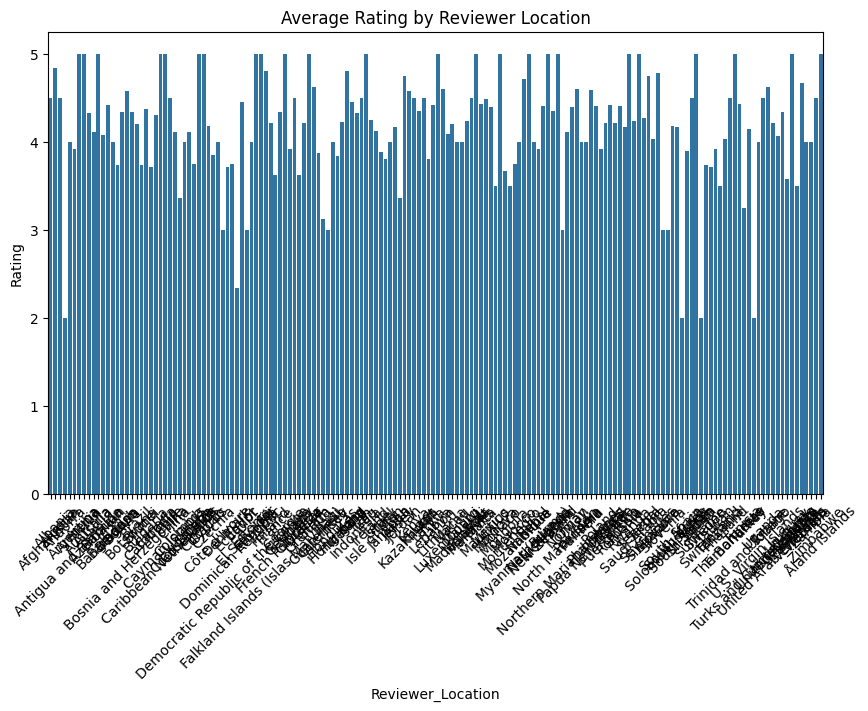

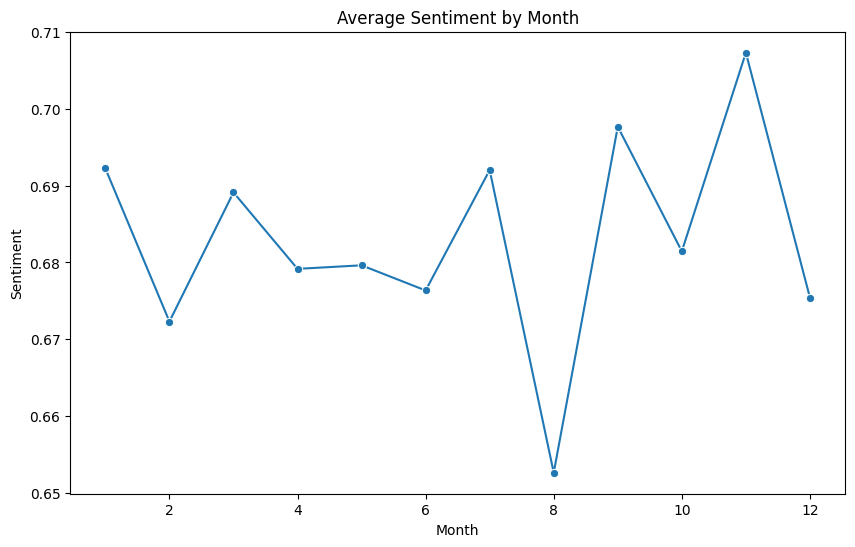

In [2]:
rating_by_location = df.groupby('Reviewer_Location').agg({'Rating': 'mean', 'Sentiment': 'mean'}).reset_index()

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Reviewer_Location', y='Rating', data=rating_by_location)
plt.title('Average Rating by Reviewer Location')
plt.xticks(rotation=45)
plt.show()

sentiment_by_month = df.groupby('Month').agg({'Sentiment': 'mean'}).reset_index()

# Plot the sentiment trends by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sentiment', data=sentiment_by_month, marker='o')
plt.title('Average Sentiment by Month')
plt.show()



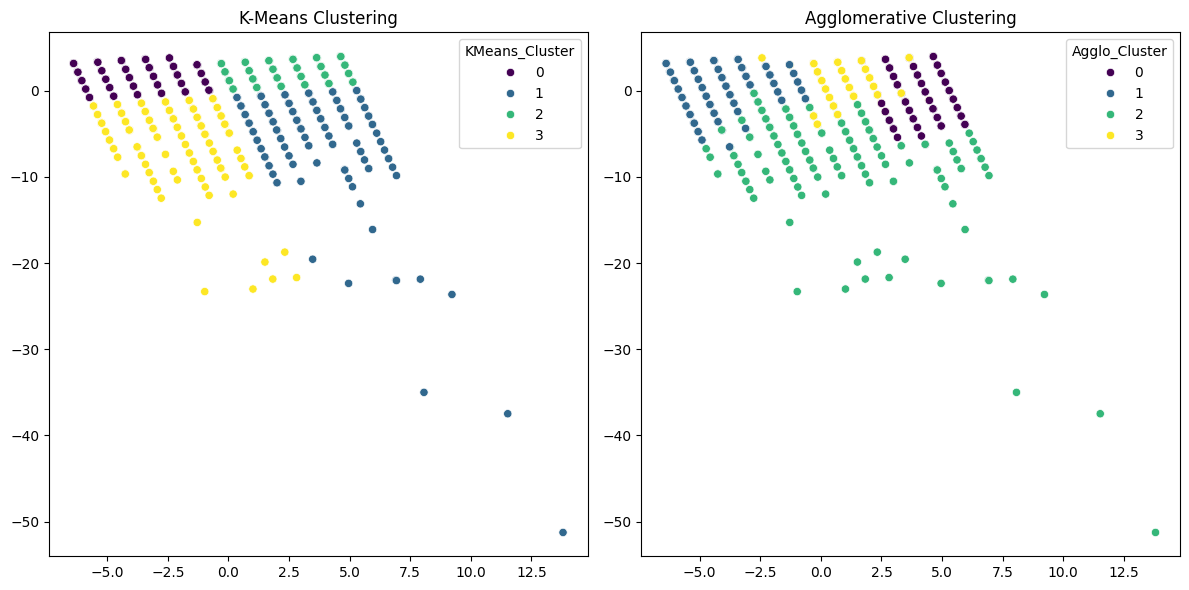

KMeans Cluster Distribution:
KMeans_Cluster
0    11802
2    11754
1     9741
3     6870
Name: count, dtype: int64

Agglomerative Clustering Cluster Distribution:
Agglo_Cluster
1    12744
0    10861
3    10231
2     6331
Name: count, dtype: int64


,Rating,Reviewer_Location,Year,Month,Sentiment,Reviewer_Location_Encoded,KMeans_Cluster,Agglo_Cluster
0,-0.218373,Australia,2019,4,0.051862,8,0,1
1,-0.218373,Philippines,2019,5,0.640789,114,0,3
2,-0.218373,United Arab Emirates,2019,4,0.644741,151,0,1
3,-0.218373,Australia,2019,4,0.347158,8,0,1
4,-0.218373,United Kingdom,2019,4,-0.826330,152,0,1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

# Data Preprocessing: Encoding 'Reviewer_Location' and normalizing relevant columns
df['Reviewer_Location_Encoded'] = LabelEncoder().fit_transform(df['Reviewer_Location'])

# Normalize continuous features: 'Rating', 'Sentiment'
scaler = StandardScaler()
df[['Rating', 'Sentiment']] = scaler.fit_transform(df[['Rating', 'Sentiment']])

# Clustering using K-Means based on Year, Month, Rating, and Sentiment
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df[['Year', 'Month', 'Rating', 'Sentiment']])

# Clustering using Agglomerative Clustering based on Year, Month, Rating, and Sentiment
agglo = AgglomerativeClustering(n_clusters=4)
df['Agglo_Cluster'] = agglo.fit_predict(df[['Year', 'Month', 'Rating', 'Sentiment']])

# Visualizing clusters with PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Year', 'Month', 'Rating', 'Sentiment']])

# Plotting the K-Means clustering result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')

# Plotting the Agglomerative Clustering result
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Agglo_Cluster'], palette='viridis')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

# Display the cluster distribution for both clustering methods
print("KMeans Cluster Distribution:")
print(df['KMeans_Cluster'].value_counts())

print("\nAgglomerative Clustering Cluster Distribution:")
print(df['Agglo_Cluster'].value_counts())

# Show the first few rows of the clustered dataset
df.head()

C:\Users\angsp\AppData\Local\Temp\ipykernel_4676\3647748596.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='Rating', data=df, palette="Set3")
C:\Users\angsp\AppData\Local\Temp\ipykernel_4676\3647748596.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='Sentiment', data=df, palette="Set3")


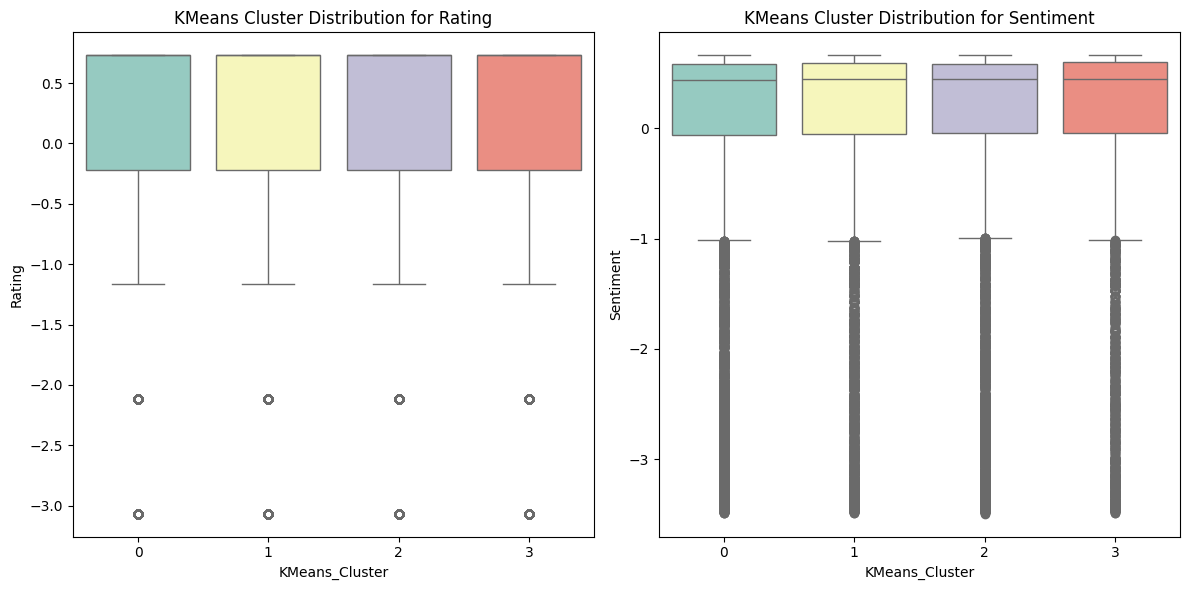

KMeans Cluster Descriptive Statistics:

                 Rating                                                    \
                  count      mean       std       min       25%       50%   
KMeans_Cluster                                                              
0               11802.0 -0.023218  1.014503 -3.066533 -0.218373  0.731014   
1                9741.0  0.010568  1.003619 -3.066533 -0.218373  0.731014   
2               11754.0  0.006898  0.999527 -3.066533 -0.218373  0.731014   
3                6870.0  0.013101  0.969736 -3.066533 -0.218373  0.731014   

                                   Sentiment            ...    Year          \
                     75%       max     count      mean  ...     75%     max   
KMeans_Cluster                                          ...                   
0               0.731014  0.731014   11802.0 -0.010723  ...  2017.0  2019.0   
1               0.731014  0.731014    9741.0  0.004423  ...  2014.0  2014.0   
2               0.731014 

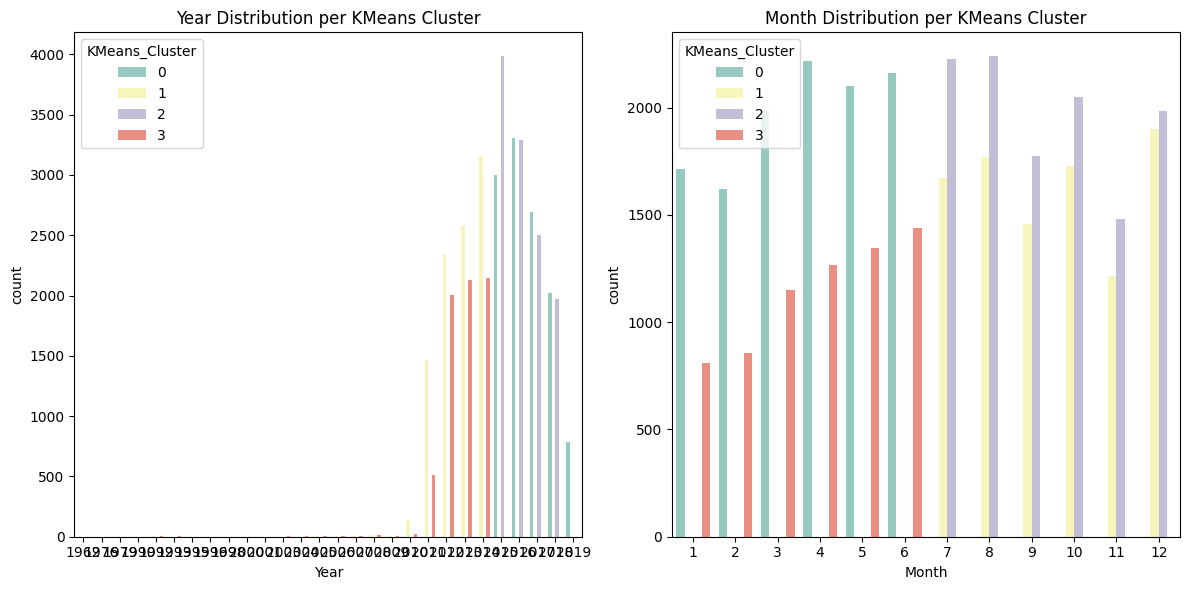

In [4]:
df = pd.read_csv("updated_disneylandreviews.csv")
df.fillna({'Rating': df['Rating'].mean(), 'Sentiment': df['Sentiment'].mean()}, inplace=True)
df = df.drop(columns=['Review_ID', 'Review_Text', 'Branch']) 

label_encoder = LabelEncoder()
df['Reviewer_Location_Encoded'] = label_encoder.fit_transform(df['Reviewer_Location'])

df['Reviewer_Location_Encoded'] = pd.factorize(df['Reviewer_Location'])[0]
scaler = StandardScaler()
df[['Rating', 'Sentiment']] = scaler.fit_transform(df[['Rating', 'Sentiment']])

kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df[['Year', 'Month', 'Rating', 'Sentiment']])

agglo = AgglomerativeClustering(n_clusters=4)
df['Agglo_Cluster'] = agglo.fit_predict(df[['Year', 'Month', 'Rating', 'Sentiment']])
plt.figure(figsize=(12, 6))

# Rating distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='KMeans_Cluster', y='Rating', data=df, palette="Set3")
plt.title('KMeans Cluster Distribution for Rating')

# Sentiment distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y='Sentiment', data=df, palette="Set3")
plt.title('KMeans Cluster Distribution for Sentiment')

plt.tight_layout()
plt.show()

kmeans_stats = df.groupby('KMeans_Cluster')[['Rating', 'Sentiment', 'Year', 'Month']].describe()
agglo_stats = df.groupby('Agglo_Cluster')[['Rating', 'Sentiment', 'Year', 'Month']].describe()

print("KMeans Cluster Descriptive Statistics:\n")
print(kmeans_stats)
print("\nAgglomerative Clustering Cluster Descriptive Statistics:\n")
print(agglo_stats)

plt.figure(figsize=(12, 6))

# Year distribution per cluster
plt.subplot(1, 2, 1)
sns.countplot(x='Year', hue='KMeans_Cluster', data=df, palette="Set3")
plt.title('Year Distribution per KMeans Cluster')

# Month distribution per cluster
plt.subplot(1, 2, 2)
sns.countplot(x='Month', hue='KMeans_Cluster', data=df, palette="Set3")
plt.title('Month Distribution per KMeans Cluster')

plt.tight_layout()
plt.show()

Cluster 0:

This cluster consists of reviews with a neutral rating and spread over multiple years and months. It likely represents a general or neutral group of customers.
Actionable Insight: This cluster could be the “base” or typical visitor group, whose experiences are neither extremely positive nor negative. For marketing or improvement efforts, the focus could be on converting this group into more engaged customers.

Cluster 1:

This cluster has very low ratings with reviews mainly from 2014, and the sentiment is neutral. The reviews are concentrated around the 9th month (September).
Actionable Insight: The low ratings might indicate dissatisfaction or unresolved pain points. Targeting this group with improvements or offering incentives to revisit might help retain these users. Special offers could be targeted during specific months like September.

Cluster 2:

Reviews in this cluster span multiple years, especially 2017 and 2018, with a slightly higher sentiment and a more varied rating.
Actionable Insight: This could represent a group of customers who had a mixed or neutral experience, but some customers are happier than in Cluster 1. They may be less loyal. Offering loyalty incentives or improving overall customer satisfaction might lead to more consistent positive feedback.

Cluster 3:

This cluster also represents reviews from 2014, with a similar pattern to Cluster 1 but a slightly higher sentiment score. The reviews are mostly from March.
Actionable Insight: Like Cluster 1, this cluster should be approached with focused retention campaigns or an effort to improve experiences during March. These reviews could highlight areas where Disney needs to improve or offer special promotions for specific periods (March).